In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
sns.set()

In [52]:
df = pd.read_csv('../data/Collection_of_data/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


### Tip--1

**Use Column Transformer to apply different preprocessing on different Columns**


In [53]:
df = df[['fare','embarked','sex','age']]
df.head()
df['age'] = df['age'].apply(lambda x : x.replace("?", '0'))

In [54]:
df.head(3)

,fare,embarked,sex,age
0,211.3375,S,female,29
1,151.55,S,male,0.9167
2,151.55,S,female,2


In [4]:
#For Example : We want to use OneHotEncoder On (embarked , sex) and fill missing values on (age) With mean value
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer , make_column_selector
one_hot = OneHotEncoder()
imputer = SimpleImputer()
column_transformer = make_column_transformer(
    (one_hot , ['embarked','sex']), # *Line 1*
    (imputer , ['age']),
    remainder="passthrough" # we can use drop if we want 
   
    #Note : 
    # we can use make_column_Selector to choose columns According to pattern if we want, for example :
    #(one_hot , make_column_selector(pattern = 'E|S'))
    #It Will do the same thing as Line 1
    
    #Another Way to looking for the index
    #(one_hot , [1,2])
    
    #One More :) , We Can take a Slice of Index
    #(one_hot , slice(1,3))
    
)
column_transformer.fit_transform(df)

array([[0.0, 0.0, 0.0, ..., 0.0, 29.0, '211.3375'],
       [0.0, 0.0, 0.0, ..., 1.0, 0.9167, '151.55'],
       [0.0, 0.0, 0.0, ..., 0.0, 2.0, '151.55'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 26.5, '7.225'],
       [0.0, 1.0, 0.0, ..., 1.0, 27.0, '7.225'],
       [0.0, 0.0, 0.0, ..., 1.0, 29.0, '7.875']], dtype=object)

### Tip--2


**What Is The Difference Between Fit and Transform Methods**

Fit : the Transformer Learn something about the data <br>
transform : it uses what it learned to do the data transformation 

For Example : <br>
`SimpleImputer` : <br>
    fit : learns the value to impute <br>
    transform : transform fills in missing entries the imputition value 


### Tip--3

**Use `Fit_Transform` On Training Data , But `Transform` Only on Testing/New Data**

### Tip--4

**Use Sklearn Not Pandas for ML Preprocessing**

### Tip--5

**Two Common Ways To Encode Categorical Features** <br>
1 - `OneHotEncoder` For Nominal Data (unordered)<br>
2 - `OrdinalEncoder`for ordered data

In [5]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
df = pd.DataFrame(np.array([['cat','dog','monkey'],['car','ship','house'],['first','second' , 'third']]).T,columns=['animals','ay_klam','ay_klam_bardo'])
df

,animals,ay_klam,ay_klam_bardo
0,cat,car,first
1,dog,ship,second
2,monkey,house,third


In [6]:
# we used here one hot encoder because the data has no meaning with order
# use handel_unknow = ignore to set all values = 0 if we got any categorical value we had not seen in training data
one_hot = OneHotEncoder(sparse = False , handle_unknown= 'ignore')
one_hot.fit_transform(df[['animals']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
# but according to third column there is meaning with order for example : 
# if we need te predict the price of tickets on any festival , we know that there is a relation between the class
# and the predicted price of the ticket , because the first calss for sure has a price more than the third one 
# if we used one hot encoder we are loosing the meaning of realation , but it will still can catch the relation accroding to
# is it first class or not ? is it second class or not ? and so on
ord_enc = OrdinalEncoder(categories=[['first','second','third']])
ord_enc.fit_transform(df[['ay_klam_bardo']])

array([[0.],
       [1.],
       [2.]])

### Tip--6

**Use Pipeline, But What it is ?**<br>
`Ans:` Chain Together Multible steps : output of each step is used as input to the next step <br>
`Benefits:`<pre>
 1 - Better Performance <br>
 2 - easy to implement <br>
 3 - prevent data leakage 

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
imputer = SimpleImputer()
clf = LogisticRegression()
pipe = make_pipeline(imputer , clf)

In [9]:
# Dump data
df = pd.DataFrame(np.array([[15.5,20,40,np.nan],[1,0,0,1]]).T , columns=['feature','label'])
df

,feature,label
0,15.5,1.0
1,20.0,0.0
2,40.0,0.0
3,NaN,1.0


In [10]:
X ,y = df[['feature']] , df['label']
pipe.fit(X,y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

In [11]:
# make dump test data to check the results
X_new = pd.DataFrame(np.array([15,13,14,np.nan]).T , columns=['Ft1'])
X_new = X_new[['Ft1']]
# to predict Test/New Data use pipe.predict it will using the same procedure -- impute first then make a preciction
pipe.predict(X_new)

array([1., 1., 1., 0.])

### Tip--7

In [12]:
x = pd.DataFrame(np.array([1,2,3,np.nan,15]).T , columns=['age'])
x

,age
0,1.0
1,2.0
2,3.0
3,NaN
4,15.0


In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(x)
# As u can see , it add more info about the missing values 

array([[ 1.  ,  0.  ],
       [ 2.  ,  0.  ],
       [ 3.  ,  0.  ],
       [ 5.25,  1.  ],
       [15.  ,  0.  ]])

### Tip--8

**Impute Missing Values Using KNNImputer Or IterativeImputer, but what is the difference ?**

In [14]:
# Let's say we have these dump data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer , IterativeImputer
df = pd.DataFrame(np.array([[1,1,0,1,0],[71,98.3,22,56,156],[22,17 ,18 , np.nan ,52]]).T,columns=['SibSp','Fare','Age'])
df


,SibSp,Fare,Age
0,1.0,71.0,22.0
1,1.0,98.3,17.0
2,0.0,22.0,18.0
3,1.0,56.0,NaN
4,0.0,156.0,52.0


In [15]:
#The Iterative Imputer method Works in the way that it's search for the whole rows that does not have missing value 
#and tries to make a regression model to predict the missing values (Assuming that there are correlation between features)

it_imputer = IterativeImputer()# u can specify the model u want to use 
it_imputer.fit_transform(df)

array([[  1.        ,  71.        ,  22.        ],
       [  1.        ,  98.3       ,  17.        ],
       [  0.        ,  22.        ,  18.        ],
       [  1.        ,  56.        ,  21.00337838],
       [  0.        , 156.        ,  52.        ]])

In [16]:
# KnnImputer works in a simialr way ,but in contrast instead of making regression model to predict missing values
# it looks for the distances between the instaces(Rows) Assuming that similar rows have similar behaviour
# say we looking for the most 2 closest rows to find the null value in Fourth row , it will calculate the distance 
# Between Row 4 and the whole data and estimate the missing values by the most 2 closest values
knn_imputer = KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(df)

array([[  1. ,  71. ,  22. ],
       [  1. ,  98.3,  17. ],
       [  0. ,  22. ,  18. ],
       [  1. ,  56. ,  20. ],
       [  0. , 156. ,  52. ]])

### Tip--9

**How do u examine intermediate Steps in a Pipeline?**<br>
`Ans :`<br>
 By Usine Step_named_attribute

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
imputer = SimpleImputer()
clf = LogisticRegression()
pipe = make_pipeline(imputer , clf)

In [18]:
# Dump data
df = pd.DataFrame(np.array([[15.5,20,40,np.nan],[1,0,0,1]]).T , columns=['feature','label'])
df

,feature,label
0,15.5,1.0
1,20.0,0.0
2,40.0,0.0
3,NaN,1.0


In [19]:
# Use (;) to disable showing the output
X ,y = df[['feature']] , df['label']
pipe.fit(X,y);

In [20]:
# Check the mean and Coef of the model
pipe.named_steps.simpleimputer.statistics_ , pipe.named_steps.logisticregression.coef_

(array([25.16666667]), array([[-0.14422112]]))

### Tip--10

**Compare Multiple ROC Curves in a Single Plot**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

In [22]:
df = pd.read_csv('../diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [23]:
X = df.drop(columns= 'Outcome').values
y = df['Outcome'].values
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state= 33)
lr , dt , rf = LogisticRegression() , DecisionTreeClassifier() , RandomForestClassifier()
lr.fit(X_train , y_train)
dt.fit(X_train , y_train)
rf.fit(X_train , y_train);

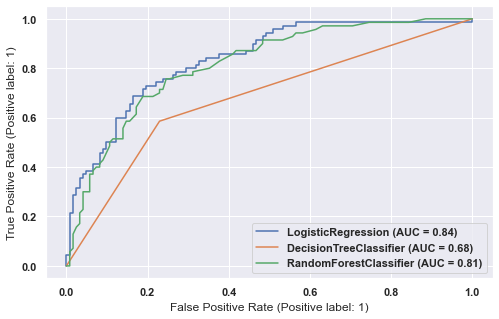

In [24]:
disp = plot_roc_curve(lr,X_test , y_test)
plot_roc_curve(dt , X_test , y_test , ax = disp.ax_)
plot_roc_curve(rf , X_test , y_test , ax = disp.ax_)

### Tip--11

**Use Cross-Validate and GridSeach With Pipeline, But Why?**

Simply , Preprocessing Will Automatically Occur After Each Cross-Validate split To Prevent Data Leakage,
To Get Meaningful Scores

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
imputer = SimpleImputer()
lr = LogisticRegression()

In [26]:
df = pd.read_csv('../data/Collection_of_data/heart-disease.csv')
df = df[['age','sex','chol','target']]
df.head(3)

,age,sex,chol,target
0,63,1,233,1
1,37,1,250,1
2,41,0,204,1


In [27]:
X = df.drop(columns='target')
y = df.target
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state= 33)
lr = LogisticRegression()
#Imagine there is more than 1 transformer like OneHotEncoder
ct = make_column_transformer((imputer,['age']))
pipe = make_pipeline(ct , clf)
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(), ['age'])])),
                ('logisticregression', LogisticRegression())])

In [28]:
from sklearn.model_selection import cross_val_score , GridSearchCV
cross_val_score(pipe , X , y , cv = 5 ).mean()

0.6234426229508196

In [29]:
params = {}
params['logisticregression__C'] = [1,2,5]
params['columntransformer__simpleimputer__strategy'] = ['mean','median']
params['logisticregression__penalty'] = ['l1','l2']
grid = GridSearchCV(pipe , params , cv = 5 , scoring='accuracy')

In [30]:
grid.fit(X,y)
grid.best_score_

0.6234426229508196

In [31]:
grid.best_params_

{'columntransformer__simpleimputer__strategy': 'mean',
 'logisticregression__C': 1,
 'logisticregression__penalty': 'l2'}

### Tip--12

**Use The Correct Method with pipeline**<br>
Yeah,There is more than one :<pre>
1-pipeline ends with a classifier(Regression,Classification) Use :<br>
pipe.fit(), it will run the whole transformation first and ends with fit the model ,(Note) pipe.predict() for (New/test) data
________________________________________
2- pipeline ends with just a transformer , Use pipe.fit_transform() to train data And pipe transform with New/Test data

### Tip--13

**Use Stratified Method with train/test split with an imbalance data**

In [32]:
df = pd.read_csv('../data/Collection_of_data/heart-disease.csv')
df = df[['age','sex','chol','target']]
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [33]:
# Say we have the count of 1 = 30 and the count of 0 = 200 ,So it obvious we need to use a method to split the data ,
# but there is a proplem!, what if when we splits the data, the Whole class 1 falls in train data ? it is a problem 
# u will think u got a 100% score but unfortunately it is a wrong score
# The Answer Here is using Stratified Method when splits the data
X_train , X_test , y_train , y_test = train_test_split(X , y,test_size=0.2 , stratify=y)

In [34]:
# it has the same propotion
y_train.value_counts() , y_test.value_counts() , 132/242 , 33 / 61

(1    132
 0    110
 Name: target, dtype: int64,
 1    33
 0    28
 Name: target, dtype: int64,
 0.5454545454545454,
 0.5409836065573771)

### Tip--14

**Two Options to impute missing Values for Categorical Feature**<pre>
**1-impute with the most_frequent value (mode)**
**2-if the missing values is a large number treat it as a new class, for example make it equal "missing"**

### Tip--15

**Shuffle Your Data Before Using Cross-Validation With KFolds Or StratifiedKFold**

In [35]:
from sklearn.model_selection import KFold , StratifiedKFold
kf = KFold(5 , shuffle=True ,random_state=33)
cross_val_score(lr , X,y , cv = kf)

array([0.68852459, 0.6557377 , 0.63934426, 0.61666667, 0.6       ])

### Tip--16

**U can make Feature Engineering Within a ColumnTransformer**

In [36]:
from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer
df = pd.read_csv('../2. Cars Data1.csv')
df = df[['Model','Type','Length']].head(3)
df

,Model,Type,Length
0,MDX,SUV,189.0
1,RSX Type S 2dr,Sedan,172.0
2,TSX 4dr,Sedan,183.0


In [37]:
# it's very useful for preventing data leakage and it is better when dealing with a new/test data
def first_letter(df):
    return df.apply(lambda x : x.str.slice(0,1))

get_first_letter = FunctionTransformer(first_letter)

ct = make_column_transformer((get_first_letter,['Model','Type']))
ct.fit_transform(df)

array([['M', 'S'],
       ['R', 'S'],
       ['T', 'S']], dtype=object)

In [38]:
df

,Model,Type,Length
0,MDX,SUV,189.0
1,RSX Type S 2dr,Sedan,172.0
2,TSX 4dr,Sedan,183.0


### Tip--17

**Create an interactive diagram of Pipelines**

In [39]:
from sklearn import set_config 

set_config(display = 'diagram')
ct = make_column_transformer((SimpleImputer() ,['Length']) , (get_first_letter,['Model','Type']) )
lr = LogisticRegression()
pipe = make_pipeline(ct, lr)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(), ['Length']),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<function first_letter at 0x0000023A8AE6D708>),
                                                  ['Model', 'Type'])])),
                ('logisticregression', LogisticRegression())])

### Tip--18

**Get Features Names after Column Transformer**

In [40]:
df = pd.read_csv('../data/Collection_of_data/titanic.csv')
df = df.sample(10)[['embarked','sex','fare']]
df

,embarked,sex,fare
63,S,female,61.175
37,S,male,26.55
362,S,female,21
249,C,male,262.375
500,S,male,26
608,S,male,7.25
485,C,male,12.875
568,S,male,13
406,S,male,26
1088,S,male,7.775


In [41]:
df['fare'] = pd.to_numeric(df['fare'])

In [42]:
ct = make_column_transformer((OneHotEncoder(),['embarked','sex']),remainder= 'passthrough')
ct.fit_transform(df)

array([[  0.   ,   1.   ,   1.   ,   0.   ,  61.175],
       [  0.   ,   1.   ,   0.   ,   1.   ,  26.55 ],
       [  0.   ,   1.   ,   1.   ,   0.   ,  21.   ],
       [  1.   ,   0.   ,   0.   ,   1.   , 262.375],
       [  0.   ,   1.   ,   0.   ,   1.   ,  26.   ],
       [  0.   ,   1.   ,   0.   ,   1.   ,   7.25 ],
       [  1.   ,   0.   ,   0.   ,   1.   ,  12.875],
       [  0.   ,   1.   ,   0.   ,   1.   ,  13.   ],
       [  0.   ,   1.   ,   0.   ,   1.   ,  26.   ],
       [  0.   ,   1.   ,   0.   ,   1.   ,   7.775]])

In [43]:
ct.get_feature_names()

['onehotencoder__x0_C',
 'onehotencoder__x0_S',
 'onehotencoder__x1_female',
 'onehotencoder__x1_male',
 'fare']

In [44]:
# Tip u can ignore if u want , can u remake the DataFrame with new columns ? 
features = ct.get_feature_names()
for i in features:
    print(i.split(sep = '_')[-1])


C
S
female
male
fare


### Tip--19

**Speed up GridSearchCV with Parallel Processing Using n_jobs = -1**

### Tip--20 

**U Could improve the model performance by creating multiple models and ensemble them using VotingClassifer**

In [45]:
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
df = pd.read_csv('../diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
X = df.drop(columns='Outcome')
y = df.Outcome

In [47]:
lr , rf = LogisticRegression(), RandomForestClassifier()
cross_val_score(lr,X,y).mean() , cross_val_score(rf,X,y).mean()

(0.7708768355827178, 0.7682879212290977)

In [48]:
# Usually it gets a better performance , i will tell u why in the video because it needs a good explaination
vc = VotingClassifier([('clf1',lr),('clf2',rf)] , voting = 'soft')
cross_val_score(vc , X,y).mean()

0.7734827264239028

### Tip--21

**Improve the performance of VotingClassifer With Tuning the Parameters**

In [49]:
#Note : u have to split the data before doing GridSearchCV to prevent data leakage
vc = VotingClassifier([('clf1',lr),('clf2',rf)])
params = {'voting':['soft','hard'] , 'weights':[(1,1),(1,2),(2,1)]}
grid = GridSearchCV(vc,params , n_jobs=-1)
grid.fit(X,y)

GridSearchCV(estimator=VotingClassifier(estimators=[('clf1',
                                                     LogisticRegression()),
                                                    ('clf2',
                                                     RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'voting': ['soft', 'hard'],
                         'weights': [(1, 1), (1, 2), (2, 1)]})

In [50]:
grid.best_params_

{'voting': 'soft', 'weights': (1, 2)}